In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress

# File paths
player_misc_path = "csv/player_misc.csv"
player_shooting_path = "csv/player_shooting.csv"
player_stats_path = "csv/player_stats.csv"

# Read CSV files
player_misc_df = pd.read_csv(player_misc_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_stats_df = pd.read_csv(player_stats_path)

In [37]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_misc_df, player_shooting_df, on="player", how="inner")
merged_df = pd.merge(merged_df, player_stats_df, on="player", how="inner")


merged_df = merged_df.rename(columns={'position_x': 'position',
                                      'team_x': 'team',
                                      'birth_year_x'})


# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position_x,team_x,age_x,birth_year_x,minutes_90s_x,cards_yellow_x,cards_red_x,cards_yellow_red,fouls,...,goals_assists_pens_per90,xg_y,npxg_y,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,1,0,0,4,...,0.00,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,1,0,0,3,...,0.00,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,1,0,0,2,...,0.50,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,0,0,0,1,...,0.00,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0,0,0,3,...,0.00,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,1988,3.2,0,0,0,0,...,0.62,0.8,0.8,0.6,1.4,0.27,0.20,0.46,0.27,0.46
676,Ángelo Preciado,DF,Ecuador,24-303,1998,2.9,0,0,0,8,...,0.34,0.1,0.1,0.4,0.5,0.02,0.14,0.17,0.02,0.17
677,Éder Militão,DF,Brazil,24-334,1998,3.9,1,0,0,7,...,0.00,0.2,0.2,0.0,0.2,0.05,0.01,0.05,0.05,0.05
678,Óscar Duarte,DF,Costa Rica,33-198,1989,3.0,1,0,0,1,...,0.00,0.0,0.0,0.3,0.3,0.00,0.09,0.09,0.00,0.09


In [45]:
# Count the number of players per team
players_per_team = merged_df_complete.groupby('team_x')['player'].count().reset_index()

# Display the result
players_per_team

,team_x,player
0,Argentina,24
1,Australia,20
2,Belgium,20
3,Brazil,26
4,Cameroon,22
5,Canada,19
6,Costa Rica,22
7,Croatia,21
8,Denmark,20
9,Ecuador,18


In [79]:
# calculate the age of players
current_year = datetime.now().year
merged_df_complete['age'] = current_year - merged_df_complete['birth_year_x']

# Create a new DataFrame with player name and age
player_age_df = merged_df_complete[['player', 'age']]

# Display the resulting DataFrame
player_age_df

,player,age
0,Aaron Mooy,33
1,Aaron Ramsey,33
2,Abdelhamid Sabiri,27
3,Abdelkarim Hassan,30
4,Abderrazak Hamdallah,33
...,...,...
675,Ángel Di María,35
676,Ángelo Preciado,25
677,Éder Militão,25
678,Óscar Duarte,34


In [82]:
# Calculate the average age of players per team 
players_age_per_team = merged_df_complete.groupby('team_x')['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_team = players_age_per_team.rename(columns={'age': 'avg age per team'})

# Display the result
players_age_per_team

,team_x,avg age per team
0,Argentina,28.4
1,Australia,28.3
2,Belgium,29.3
3,Brazil,29.0
4,Cameroon,27.9
5,Canada,28.7
6,Costa Rica,28.6
7,Croatia,28.8
8,Denmark,28.0
9,Ecuador,25.7


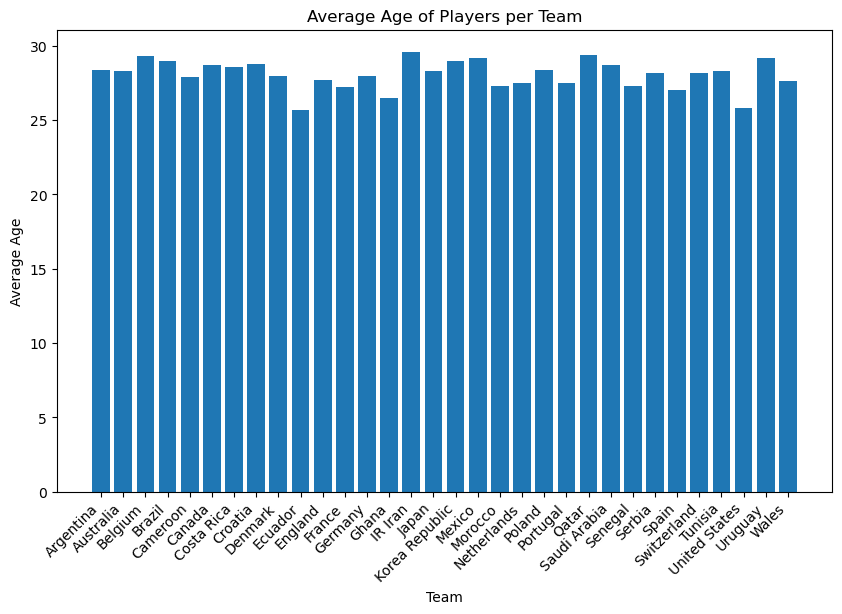

In [85]:
# Plot a bar chart for average age of players per team 
plt.figure(figsize=(10, 6))
plt.bar(players_age_per_team['team_x'], players_age_per_team['avg age per team'])
plt.title('Average Age of Players per Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [90]:
# Calculate the average age of players per position and per team, rounded to 1 decimal point
players_age_per_position_team = merged_df_complete.groupby(['position_x', 'team_x'])['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_position_team = players_age_per_position_team.rename(columns={'age': 'avg age per position'})


# Display the result
players_age_per_position_team

,position_x,team_x,avg age per position
0,DF,Argentina,28.4
1,DF,Australia,27.7
2,DF,Belgium,31.6
3,DF,Brazil,31.8
4,DF,Cameroon,27.3
...,...,...,...
123,MF,Switzerland,29.2
124,MF,Tunisia,27.2
125,MF,United States,24.2
126,MF,Uruguay,26.4


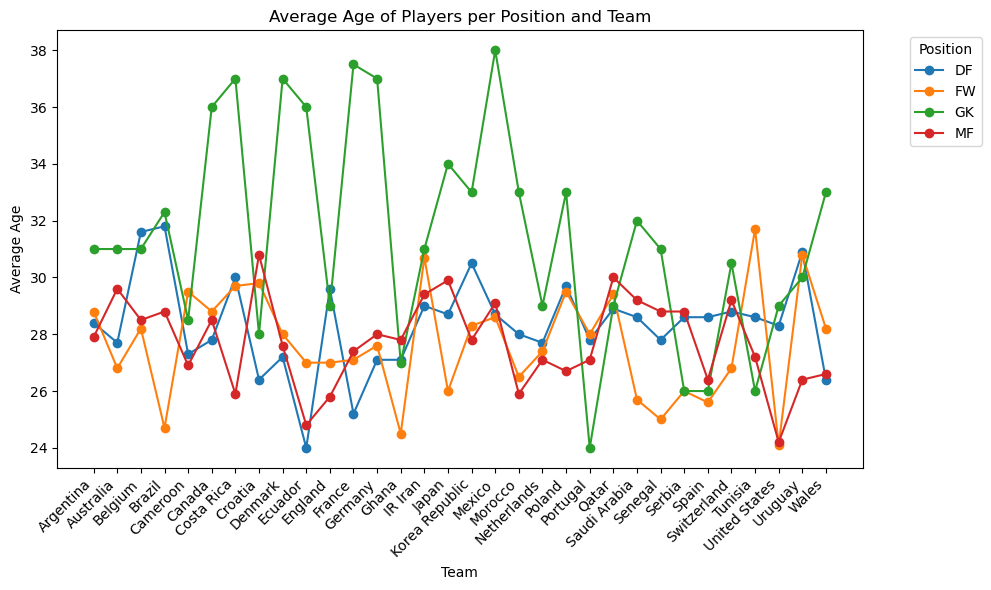

In [92]:
# Plot a line graph for average age of players per position and team 
plt.figure(figsize=(10,6))

# Iterate over each unique position
for position in players_age_per_position_team['position_x'].unique():
    position_data = players_age_per_position_team[players_age_per_position_team['position_x'] == position]
    plt.plot(position_data['team_x'], position_data['avg age per position'], label=position, marker='o')

plt.title('Average Age of Players per Position and Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()